In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

In [2]:
from requests_html import HTMLSession

In [3]:
csv = pd.read_csv("Airbnb_Texas_Rentals.csv")
df = pd.DataFrame(csv)
df.head(1)

,Unnamed: 0,average_rate_per_night,bedrooms_count,city,date_of_listing,description,latitude,longitude,title,url
0,1,$27,2,Humble,May 2016,Welcome to stay in private room with queen bed...,30.020138,-95.293996,2 Private rooms/bathroom 10min from IAH airport,https://www.airbnb.com/rooms/18520444?location...


In [4]:
austin = df[df["city"]=="Austin"]
austin.head(1)

,Unnamed: 0,average_rate_per_night,bedrooms_count,city,date_of_listing,description,latitude,longitude,title,url
16,17,$82,2,Austin,December 2015,"Cute two bedroom with lots of windows, sunny b...",30.309522,-97.73171,Cosy 2 Bedroom in Hyde Park!,https://www.airbnb.com/rooms/18550276?location...


In [5]:
# df["url"].astype('string')
urls = austin["url"].astype('str')
# urls.dtype


In [7]:
session = HTMLSession() 
test = []
for url in urls[0:10]: 
    r = session.get(url)
#     print(r.html.find('#reviews'))
    if r.html.find('#reviews'):
        reviews = r.html.find('#reviews')[0]
        review_list = [line for line in reviews.text.split("\n") if len(line) > 50]
#         time.sleep(12)
        for r in review_list:
            test.append({"url": url,
                         "review": r
                        })
    time.sleep(10)    

In [9]:
df = pd.DataFrame(test)
df.to_csv('review_sample.csv')
df

,review,url
0,Tobin was a great host! Space was nice and cle...,https://www.airbnb.com/rooms/13571814?location...
1,Tobin's condo is very clean and comfortable. H...,https://www.airbnb.com/rooms/13571814?location...
2,Tobin’s place lived up to its billing. It’s do...,https://www.airbnb.com/rooms/13571814?location...
3,This place was so cute and you felt at home as...,https://www.airbnb.com/rooms/13571814?location...
4,There were four of us who stayed at Tobin's pl...,https://www.airbnb.com/rooms/13571814?location...
5,"Great location off South Lamar area, lots of r...",https://www.airbnb.com/rooms/13571814?location...
6,Wonderful apartment! Perfect for me and my fri...,https://www.airbnb.com/rooms/13571814?location...
7,I cannot say enough positive things about Susa...,https://www.airbnb.com/rooms/46929?location=Co...
8,"This is a quiet, clean and stylish Zen-like oa...",https://www.airbnb.com/rooms/46929?location=Co...
9,Privacy and comfort are our favorite features ...,https://www.airbnb.com/rooms/46929?location=Co...


In [18]:
allr = df["review"]
r = allr.str.cat(sep=',')

In [11]:
df['review'].count()

46

In [12]:
# Generate word cloud
wordcloud = WordCloud().generate(r)

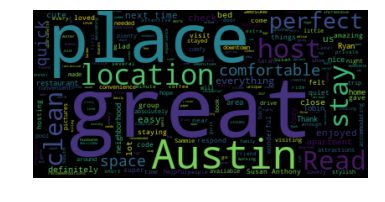

In [13]:
# Plot wordcloud and then save as png
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_airbnb_reviews_sample.png')

In [14]:
# tdict = {}
# for u, t in test[0]:
#     tdict["id"] = u
#     tdict["review"] = t
# tdict

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [16]:
# Run Vader Analysis on Passage
compound = analyzer.polarity_scores(r)["compound"]
pos = analyzer.polarity_scores(r)["pos"]
neu = analyzer.polarity_scores(r)["neu"]
neg = analyzer.polarity_scores(r)["neg"]